<img src="imgs/dh_logo.png" align="right" width="50%">

In [48]:
import numpy as np
from kmodes.kmodes import KModes

---------------

# K-Modes

Vimos em aula que  o algoritmo K-Means não consegue trabalhar com dados não numéricos (categóricos) e, apesar de podermos codificar nossas features categóricas como números, nem sempre essa será a alternativa mais apropriada. Como alternativa para esses casos em que temos variáveis categóricas, podemos utilizar uma versão do K-Means denominada K-Modes. Como o próprio nome já sugere, nesse algoritmo trabalharemos com as Modas, em vez das Médias.

A abordagem K-Modes modifica o processo K-Means padrão para agrupar dados categóricos, substituindo a função de distância euclidiana pela medida de dissimilaridade de correspondência simples, usando a moda para representar centroides de cluster e atualizando as modas com os valores categóricos mais frequentes em cada uma das iterações do processo de agrupamento. Essas modificações garantem que o processo de agrupamento vá convergir para um resultado mínimo local. A métrica de dissimilaridade usada para os modos K ​​é a distância de Hamming da teoria da informação. Quanto maior o número de incompatibilidades de valores categóricos entre X e Y são, mais diferentes são os dois objetos. 

<img src="https://miro.medium.com/max/660/0*pGD1J2G3DVWQ44S5.png">

O processo de agrupamento de K-Modes consiste nas seguintes etapas:
- Escolher aleatoriamente k indivíduos únicos como os centróides iniciais dos k cluster (modas).
- Calcular as distâncias entre cada objeto e o centroide de cada cluster; atribuindo os indivíduos aos centróides mais próximos. Nesse step usamos a distância de Hamming.
- Calcular um novo centroide, baseado nas modas de cada atributo.
- Repetir os passos até que os centroides não mudem, ou os indivíduos não mudem de cluster.

Da mesma forma que podemos utilizar o Elbow como método de escolha do número de clusters no Kmeans, vamos utilizar para o Kmodes. 

## Exemplo Prático

In [47]:
df_bank = pd.read_csv('bank-full.csv', sep=';')

In [56]:
%%time
# modelo
km = KModes(n_clusters=3, random_state=123)
clusters = km.fit_predict(df_bank)

# centroids
pd.DataFrame(km.cluster_centroids_)

CPU times: user 10.3 s, sys: 84.6 ms, total: 10.4 s
Wall time: 10.4 s


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,36,blue-collar,married,secondary,no,0,yes,no,cellular,18,may,139,1,-1,0,unknown,no
1,35,management,single,tertiary,no,0,no,no,cellular,20,aug,119,2,-1,0,unknown,no
2,41,technician,married,secondary,no,0,no,yes,cellular,29,jul,85,3,-1,0,unknown,no


In [65]:
km.predict(df_bank)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

# Agrupamento Hierárquico

Os algoritmos de agrupamento hierárquico reúnem indivíduos similares em grupos. Dois tipos desses algoritmos são:


- Aglomerativo: O tipo aglomerativo usa uma abordagem Bottom up. A ideia principal aqui é começar com todos os indivíduos separadamente, cada um representnado um único cluster e então, pouco a pouco, ir aglomerando todos os dados, até que todos os pontos formem um único cluster.

- Divisivo: O tipo divisivo, por sua vez, usa uma abordagem conhecida como Top down. A ideia é iniciar a clusterização,assumindo que todos os dados fazem parte de um único cluster. Pouco a pouco, a cada iteração, os pontos são desmembrados em clusters menores, até o ponto em que cada cluster é representado por um único indivíduo da amostra.

O diagrama abaixo mostra esse processo:

<img src="https://miro.medium.com/max/627/0*E-qictlO_9isi0Dl.png" >


O algoritmo em si, funciona da seguinte forma:
<br>
<br>
1) Cada linha do dataset corresponderá,incialmente, a um cluster específico
<img src="https://miro.medium.com/max/700/1*PPmCcLOkDIEVbv1ZAMF18g.png">
<br>
2) Tomamos os dois clusters mais próximos e condensamo-os em um novo cluster
<img src="https://miro.medium.com/max/700/1*r-XmRRM1VpdIS81ufbtmCQ.png">
<br>
3) Repetimos o processo, até que todos os dados pertençam a um único cluster
<img src="https://miro.medium.com/max/700/1*RrAR6lueQ1cqXi0aNddSvg.png">

O resultado final da clusterização é um gráfico chamado de dendrograma.

O dendrograma é um diagrama que representa os clusters e as distâncias entre eles.

<img src="https://miro.medium.com/proxy/1*LBOReupihNEsI6Kot3Q6YQ.png">

Uma visão mais intuitiva da hierarquia formada:<br>
<img src="https://miro.medium.com/max/1000/1*JPQRbJDw2E1_HEvwzVTDDw.jpeg">
<img src="https://miro.medium.com/max/1000/1*fw1vlNtq2vPFmAXsBy1_dA.jpeg">

Os pontos 9 e 23, por exemplo, formam um único cluster. A distância entre eles é de 0.15. Depois que eles se juntam, incorporam a amostra 17 a eles, formando um terceiro "subcluster" na hierarquia.

No final, temos um único cluster. Lembrando que essa é a abordagem Bottom Up. A Abordagem Top down segue os mesmos passos anteriores, mas no sentido de desmembramento.

Podemos usar um dendrograma para visualizar o histórico de agrupamentos e descobrir o número ideal de clusters.
Para isso:

- Determine a maior distância vertical que não intercepta nenhum dos outros clusters
- Desenhe uma linha horizontal em ambas as extremidades

O número ideal de clusters é igual ao número de linhas verticais passando pela linha horizontal.
Por exemplo, no caso acima, a melhor escolha para número de clusters será 4.

Nesse algoritmo podemos variar tanto a métrica de distância, quanto a forma como ela é generalizada para os clusters. Vejamos:


- Single Linkage:<br>
A distância entre os clusters é representada pela mínima distância entre instâncias de cada cluster
    <img src="https://miro.medium.com/max/1400/1*es5FXhkbEGXzYJbljM3kwA.png" width=400>

- Prós:
    Essa abordagem pode clusterizar formatos não elípticos, desde que a distância entre os clusters não seja muit pequena.
<img src="https://miro.medium.com/max/982/1*C-BNL_MDzJ6uXKgvhBy0Pg.jpeg">
<img src="https://miro.medium.com/max/982/1*iQDFke1lM13R82JPG3GqNg.jpeg">
- Contras:
    Não consque separar bem, se existir ruído entre os clusters
    <img src="https://miro.medium.com/max/734/1*ViZVqbai7fDLZZ4kpfXyUg.jpeg">
    <img src="https://miro.medium.com/max/734/1*zTG9v1NQlUYD5N6NM70wRg.jpeg">


- Complete Linkage:<br>
A distância entre os clusters é representada pela máxima distância entre instâcnias de cada cluster
    <img src="https://miro.medium.com/max/1400/1*_MtnDQmsLh54vlRdo0BkcA.png" width=400>

- Prós:
    Essa abordagem permite clusterizar quando há ruído entre os clusters.
<img src="https://miro.medium.com/max/734/1*xpR9pkp5Z4P7ZUBtoF-eWA.jpeg">
<img src="https://miro.medium.com/max/734/1*pjGdCFuhMD_DWjxYkN8QRA.jpeg">
- Contras:
    É viesada quando existem clusters muito grandes. 
    <img src="https://miro.medium.com/max/734/1*hpzH_kxtv_YGzi8cSwIXzA.jpeg">
    <img src="https://miro.medium.com/max/734/1*itIRbzJFd4_5AUNs7G0zdw.jpeg">

- Average Linkage:<br>
A distância entre os clusters é representada pela média da distância entre instâncias de cada cluster
    <img src="https://miro.medium.com/max/1400/1*3xyaBTEqkF7EH8I_0tqfXw.png" width=400>

Possui os mesmos prós e contras da abordagem anterior.

- Ward Linkage
A distância entre os clusters é a SSE
<img src="https://miro.medium.com/max/1028/1*oAKli0U57Z20-GNpcqy6AA.png">

Possui os mesmos prós e contras da abordagem anterior.

- Limitações do algoritmo:
- Não existe uma função matemática de custo para otimizar
- Todas as abordagens para calcular a distâncias entre os clusters possuem desvantagens
- Em um dataset com alta dimensionalidade, o tempo de cálculo aumenta muito

## Exemplo Prático

In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [81]:
df = pd.read_csv('dataset1.csv')

In [82]:
pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')), ('scaler', MinMaxScaler())])

In [83]:
X  = df.drop('CUST_ID', axis=1)

In [85]:
X1 = pipe.fit_transform(X)

In [91]:
sch.linkage(X1, method='ward')

array([[5.21900000e+03, 8.44200000e+03, 1.72999894e-04, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 2.06843536e-04, 2.00000000e+00],
       [4.62900000e+03, 7.91900000e+03, 4.08797153e-04, 2.00000000e+00],
       ...,
       [1.78870000e+04, 1.78910000e+04, 2.42228899e+01, 4.18700000e+03],
       [1.78930000e+04, 1.78950000e+04, 3.28216626e+01, 4.76300000e+03],
       [1.78960000e+04, 1.78970000e+04, 6.75834039e+01, 8.95000000e+03]])

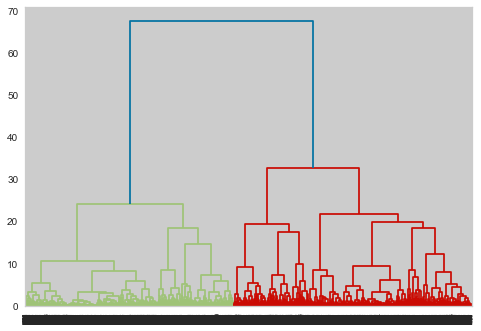

In [88]:
dendrogram = sch.dendrogram(sch.linkage(X1, method='ward'))

In [92]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X1)
labels = model.labels_

In [93]:
labels

array([1, 1, 0, ..., 0, 1, 0])

# Bônus - K-Prototypes

https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb

https://www.youtube.com/watch?v=8eATPLDJ0NQ

https://github.com/srivatsan88/YouTubeLI/blob/master/K_Prototype_for_Mixed_Datatypes.ipynb

https://medium.com/analytics-vidhya/practical-implementation-of-k-means-hierarchical-and-dbscan-clustering-on-dataset-with-bd7f3d13ef7f